In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


In [31]:
# File path to the dataset
file_path = 'indeed_jobs.csv'

# Load the CSV file into a Pandas DataFrame
try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print(f"File not found: {file_path}")
    exit()


Dataset loaded successfully!


In [32]:
# Display basic dataset information
print("Dataset Overview:")
print(df.info())

# Display the first few rows
print("\nSample Data:")
print(df.head())


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706 entries, 0 to 705
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Job Title    706 non-null    object
 1   Company      706 non-null    object
 2   Link         706 non-null    object
 3   Description  706 non-null    object
dtypes: object(4)
memory usage: 22.2+ KB
None

Sample Data:
                                           Job Title         Company  \
0  Teach English at TALK TODAY USA in Fes, Morocc...  Talk Today USA   
1          Remote Sales Specialist (Arabic Speaking)  Talk Today USA   
2                           Administrateur de ventes  Talk Today USA   
3                             Administration Officer  Talk Today USA   
4               Technical Customer Support - Morocco  Talk Today USA   

                                                Link  \
0  https://ma.indeed.com/q-morocco-emplois.html?v...   
1  https://ma.indeed.com/q-

In [33]:
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)



Missing Values:
Job Title      0
Company        0
Link           0
Description    0
dtype: int64


In [34]:
# Analyze unique job titles and companies
unique_jobs = df['Job Title'].nunique()
unique_companies = df['Company'].nunique()

print(f"\nNumber of unique job titles: {unique_jobs}")
print(f"Number of unique companies: {unique_companies}")



Number of unique job titles: 608
Number of unique companies: 37


C:\Users\imane\AppData\Local\Temp\ipykernel_17664\3225255328.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_jobs.values, y=top_jobs.index, palette="viridis")


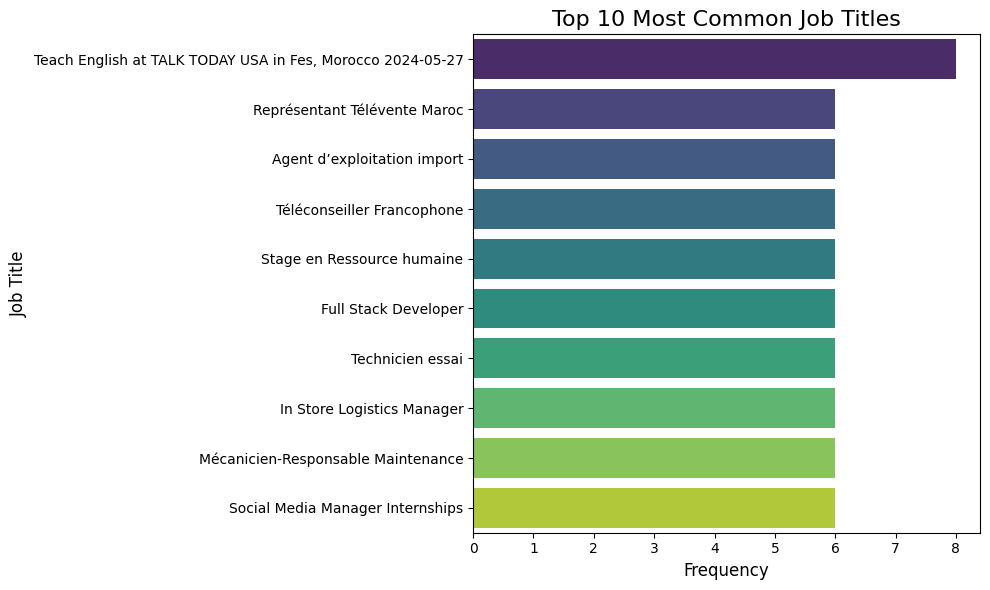

In [35]:
# Get the top 10 most common job titles
top_jobs = df['Job Title'].value_counts().head(10)

# Visualization: Bar chart for top 10 job titles
plt.figure(figsize=(10, 6))
sns.barplot(x=top_jobs.values, y=top_jobs.index, palette="viridis")
plt.title("Top 10 Most Common Job Titles", fontsize=16)
plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Job Title", fontsize=12)
plt.tight_layout()
plt.show()


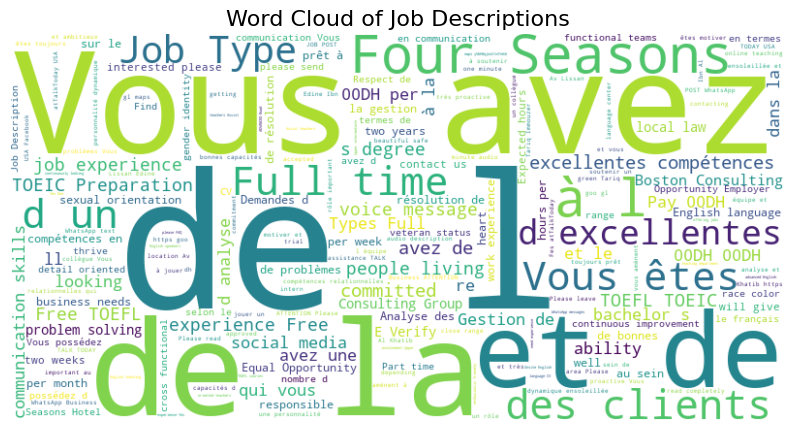

In [36]:
# Create a Word Cloud for job descriptions
job_descriptions = " ".join(df['Description'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(job_descriptions)

# Visualization: Word Cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Job Descriptions", fontsize=16)
plt.show()


C:\Users\imane\AppData\Local\Temp\ipykernel_17664\3832205511.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_companies.values, y=top_companies.index, palette="muted")


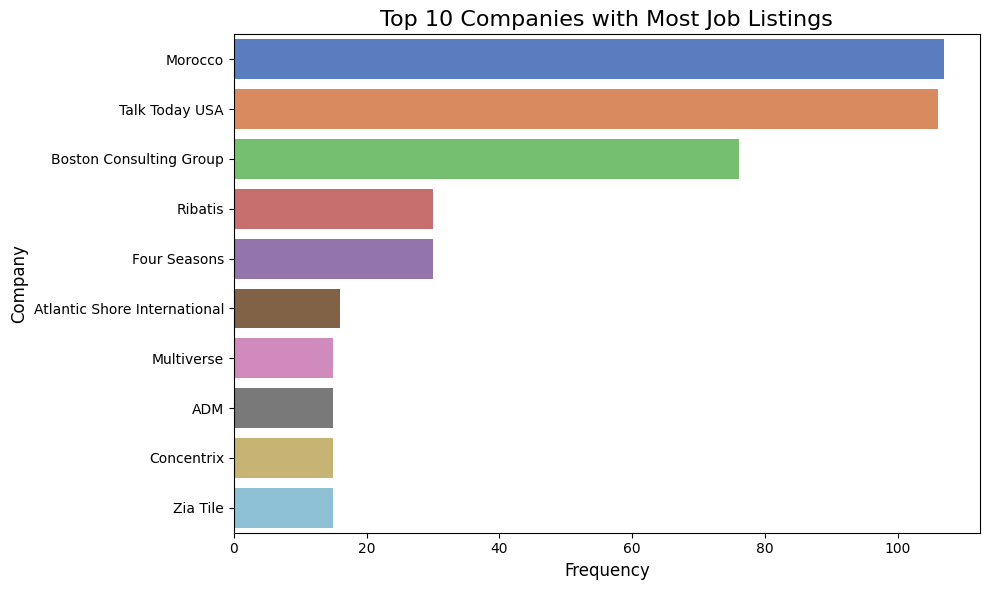

In [37]:
# Count of jobs per company (Top 10)
top_companies = df['Company'].value_counts().head(10)

# Visualization: Bar chart for top companies
plt.figure(figsize=(10, 6))
sns.barplot(x=top_companies.values, y=top_companies.index, palette="muted")
plt.title("Top 10 Companies with Most Job Listings", fontsize=16)
plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Company", fontsize=12)
plt.tight_layout()
plt.show()


In [38]:
# Count the number of duplicated rows
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicated rows: {duplicate_rows}")
duplicates = df[df.duplicated()]
print("Duplicated rows:")
print(duplicates)
# Drop duplicate rows
df_cleaned = df.drop_duplicates()

# Verify the shape of the cleaned dataset
print(f"Dataset after removing duplicates: {df_cleaned.shape[0]} rows")



Number of duplicated rows: 61
Duplicated rows:
                                             Job Title  Company  \
75                          Téléconseiller Francophone  Morocco   
76                          Stage en Ressource humaine  Morocco   
77                                Full Stack Developer  Morocco   
78                                    Technicien essai  Morocco   
79                          In Store Logistics Manager  Morocco   
..                                                 ...      ...   
131  Deutschsprachige/r telefonberater/in - gehalt ...  Morocco   
132                                        Back Office  Morocco   
133                       Représentant Télévente Maroc  Morocco   
134                        Agent d’exploitation import  Morocco   
237                                      HR Generalist   TikTok   

                                                  Link  \
75   https://ma.indeed.com/jobs?q=morocco&start=40&...   
76   https://ma.indeed.com/jobs?